In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os

def sigmoidFunction(x):
  return 1 / (1 + np.exp(-x))

def hypothesisFunction(w, x, b):
    z = np.dot(w, x) + b
    return sigmoidFunction(z)

def lossFunction(w, x, y, b):
    hyp = hypothesisFunction(w, x, b)
    p1 = np.dot( y, np.log(hyp) )
    p2 = np.dot( np.add(1, np.multiply(-1, y)), np.log(np.add(1, np.multiply(-1, hyp))) )
    Z = np.sum(np.add(p1, p2))
    return np.multiply(-1/x.shape[0] , Z)
    

[[-0.01750414 -0.01945313 -0.01970176 -0.01908111 -0.01982775]]
[[-0.00124612 -0.00111823 -0.00139633 -0.00129395 -0.00136277 -0.001368
  -0.00134216 -0.00120626 -0.00129349]
 [-0.00099392 -0.00101737 -0.00094124 -0.00113852 -0.00087588 -0.00118495
  -0.00092918 -0.00101236 -0.00099974]
 [-0.00056087 -0.00051894 -0.00044717 -0.00040485 -0.0005148  -0.00044589
  -0.00040197 -0.0004225  -0.00055548]
 [-0.00078359 -0.00069635 -0.00056059 -0.00072678 -0.00066841 -0.00055492
  -0.00063957 -0.00060574 -0.00067404]
 [-0.00033381 -0.00029435 -0.00040699 -0.00030662 -0.00028569 -0.00032734
  -0.00037878 -0.00030485 -0.00039828]]


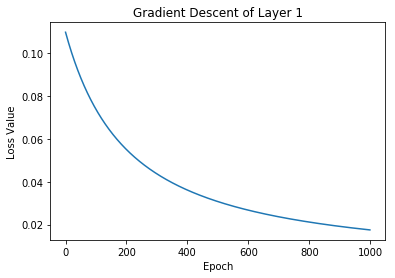

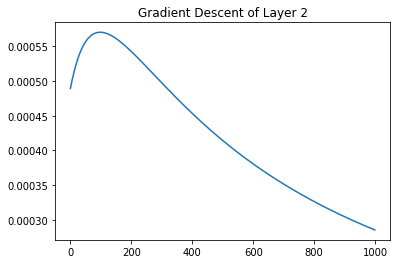

In [11]:
if __name__ == '__main__':
    
    file = "data.csv"
    
    filename = os.path.join(file)
    
    attributes = ['UpperLeft','UpperMiddle','UpperRight','MiddleLeft','MiddleMiddle','MiddleRight','LowerLeft','LowerMiddle','LowerRight','Outcome']
    df = pd.read_csv(filename, names = attributes)
    
    random.seed(1)
    np.random.seed(1)
    x = df[['UpperLeft','UpperMiddle','UpperRight','MiddleLeft','MiddleMiddle','MiddleRight','LowerLeft','LowerMiddle','LowerRight']].as_matrix() #features values
    y = df[['Outcome']].as_matrix()
    x = x.T
    y = y.T
    alpha = 0.01
    layers = 3
    w = [0, np.random.rand(5*9), np.random.rand(5)]
    w[1] = w[1].reshape((5,9))       # Shape(No Of Nodes in Current, No of Nodes in Previous Layer)
    w[2] = w[2].reshape((1,5))       # Shape(No Of Nodes in Current, No of Nodes in Previous Layer)
    a = [x,np.zeros(5),np.array([[0]])] 
    a[1] = a[1].reshape((a[1].size, 1))
    b = [0,0,np.array([[0]])]
    
    p = []
    p1 = []
    t = 0
    for e in range(1000):
        z = w[1].dot(a[0]) + b[1]
        a[1] = sigmoidFunction(z)
        a[2] = sigmoidFunction(w[2].dot(a[1]) + b[0])
            
        dz = a[2] - y
        m = 958
        dw = dz.dot(a[1].T) / m
        db = np.sum(dz) / m
        w[2] = w[2] - (alpha * dw)
        b[2] = b[2] - (alpha * db)
        p.append(abs(np.amax(dw)))
        t = dw
        #n1 = 9
        #n2 = 1
        #m = 958
        dz = w[2].T.dot(dz) * (sigmoidFunction(z) *(1 - sigmoidFunction(z)))
        dw = dz.dot(x.T) / m
        db = np.sum(dz) / m
        w[1] = w[1] - (alpha * dw)
        b[1] = b[1] - (alpha * db)
        p1.append(abs(np.amax(dw)))
        
    print(t)
    print(dw)
    plt.title("Gradient Descent of Layer 1")
    plt.xlabel("Epoch")
    plt.ylabel("Loss Value")
    plt.plot(p)
    plt.show()
    plt.title("Gradient Descent of Layer 2")
    plt.plot(p1)
    plt.show()